In [9]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

import missingno as msno


In [84]:
accounts = pd.read_csv('data/account.csv', sep=';')
cards_dev = pd.read_csv('data/card_dev.csv', sep=';')
clients = pd.read_csv('data/client.csv', sep=';')
disp = pd.read_csv('data/disp.csv', sep=';')
districts = pd.read_csv('data/district.csv', sep=';')
loans_dev = pd.read_csv('data/loan_dev.csv', sep=';')
trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')

C:\Users\nrtc\AppData\Local\Temp\ipykernel_28072\1239521831.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')


In [85]:
merged_disp_cards = pd.merge(disp, cards_dev, on='disp_id', how='left')
merged_disp_cards

,disp_id,client_id,account_id,type_x,card_id,type_y,issued
0,1,1,1,OWNER,NaN,NaN,NaN
1,2,2,2,OWNER,NaN,NaN,NaN
2,3,3,2,DISPONENT,NaN,NaN,NaN
3,4,4,3,OWNER,NaN,NaN,NaN
4,5,5,3,DISPONENT,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5364,13647,13955,11349,OWNER,NaN,NaN,NaN
5365,13648,13956,11349,DISPONENT,NaN,NaN,NaN
5366,13660,13968,11359,OWNER,1247.0,classic,950613.0
5367,13663,13971,11362,OWNER,NaN,NaN,NaN


<AxesSubplot:>

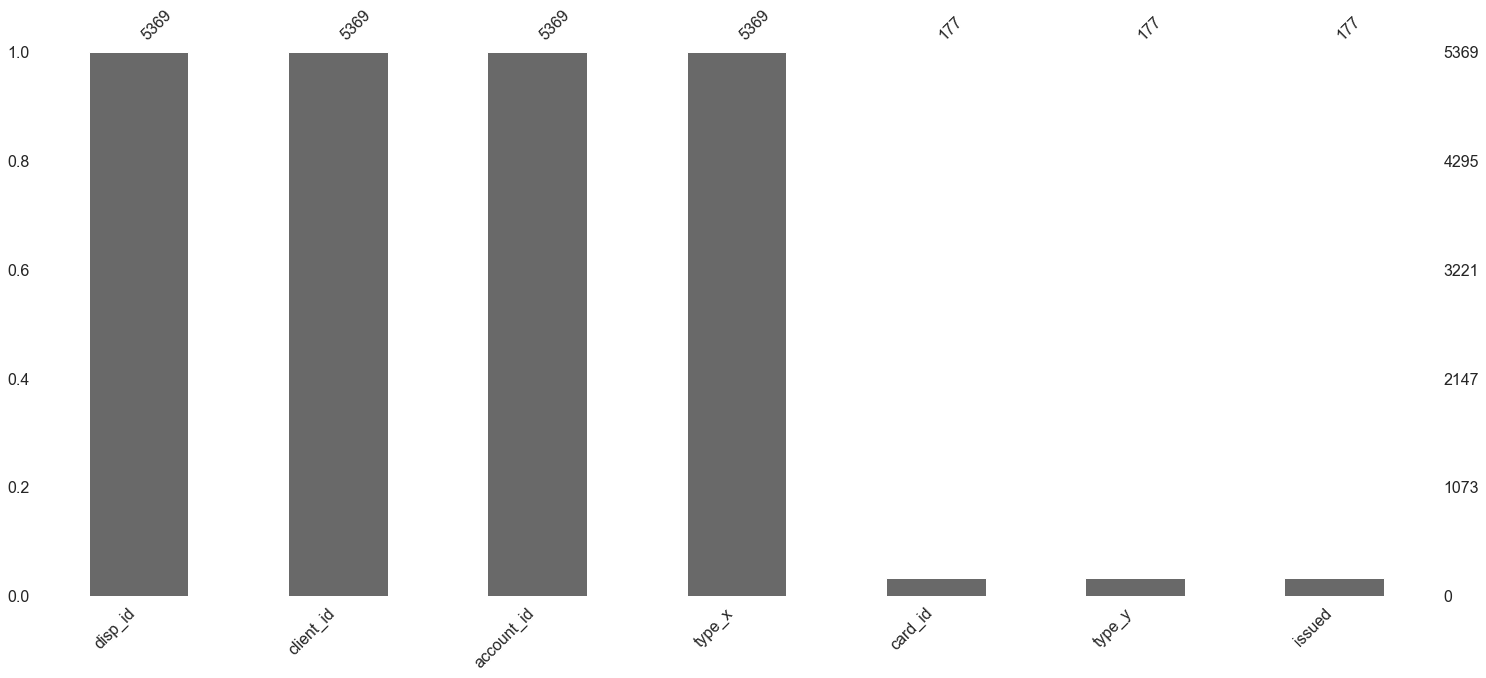

In [86]:
msno.bar(merged_disp_cards)

## Information Retrieved

Card Table is useles, only use field "has card"

In [87]:
merged_disp_cards['has_card_junior'] = merged_disp_cards['type_y'].apply(lambda x: 1 if x == 'junior' else 0)
merged_disp_cards['has_card_classic'] = merged_disp_cards['type_y'].apply(lambda x: 1 if x == 'classic' else 0)
merged_disp_cards['has_card_gold'] = merged_disp_cards['type_y'].apply(lambda x: 1 if x == 'gold' else 0)
merged_disp_cards = merged_disp_cards.drop(['type_y'], axis=1)
merged_disp_cards = merged_disp_cards.drop(['card_id'], axis=1)
merged_disp_cards = merged_disp_cards.drop(['issued'], axis=1)
merged_disp_cards = merged_disp_cards.drop(['disp_id'], axis=1)
merged_disp_cards

,client_id,account_id,type_x,has_card_junior,has_card_classic,has_card_gold
0,1,1,OWNER,0,0,0
1,2,2,OWNER,0,0,0
2,3,2,DISPONENT,0,0,0
3,4,3,OWNER,0,0,0
4,5,3,DISPONENT,0,0,0
...,...,...,...,...,...,...
5364,13955,11349,OWNER,0,0,0
5365,13956,11349,DISPONENT,0,0,0
5366,13968,11359,OWNER,0,1,0
5367,13971,11362,OWNER,0,0,0


In [88]:
merged_disp_cards.nunique()

client_id           5369
account_id          4500
type_x                 2
has_card_junior        2
has_card_classic       2
has_card_gold          2
dtype: int64

In [89]:
merged_disp_clients = pd.merge(merged_disp_cards, clients, on='client_id', how='left')
merged_disp_clients = merged_disp_clients.drop(['client_id'], axis=1)
merged_disp_clients.rename(columns={'district_id': 'client_district_id'}, inplace=True)
merged_disp_clients

,account_id,type_x,has_card_junior,has_card_classic,has_card_gold,birth_number,client_district_id
0,1,OWNER,0,0,0,706213,18
1,2,OWNER,0,0,0,450204,1
2,2,DISPONENT,0,0,0,406009,1
3,3,OWNER,0,0,0,561201,5
4,3,DISPONENT,0,0,0,605703,5
...,...,...,...,...,...,...,...
5364,11349,OWNER,0,0,0,456030,1
5365,11349,DISPONENT,0,0,0,430406,1
5366,11359,OWNER,0,1,0,680413,61
5367,11362,OWNER,0,0,0,626019,67


<AxesSubplot:>

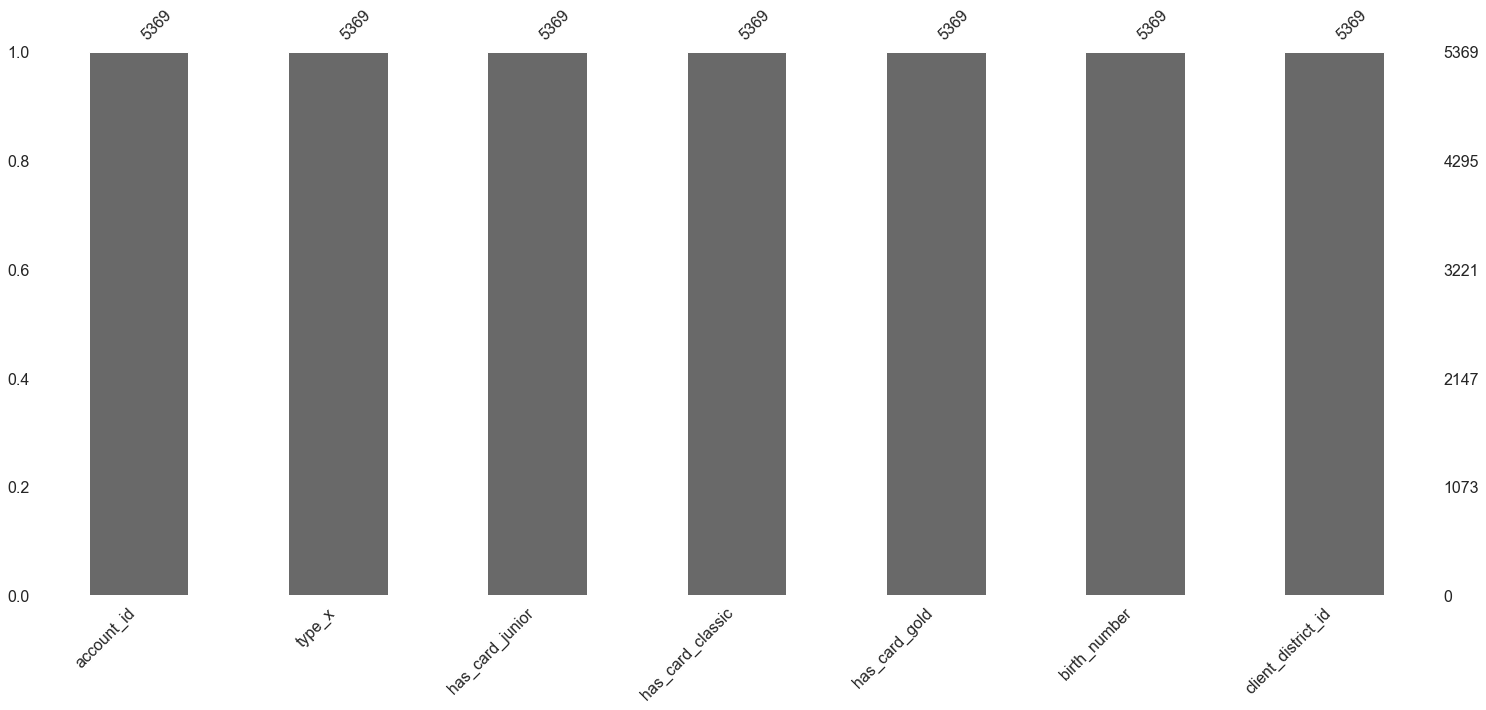

In [49]:
msno.bar(merged_disp_clients)

In [90]:
merged_disp_clients['sex'] = merged_disp_clients['birth_number'].apply(lambda x: 'male' if int(str(x)[2:4]) > 12 else 'female')
merged_disp_clients['birth_date'] = merged_disp_clients['birth_number'].apply(lambda x: '19' + str(x)[0:2] + '-' + (str(x)[2:4] if int(str(x)[2:4]) <= 12 else str(int(str(x)[2:4]) - 50)) + '-' + str(x)[4:6])
merged_disp_clients['birth_date'] = pd.to_datetime(merged_disp_clients['birth_date'])
merged_disp_clients = merged_disp_clients.drop(['birth_number'], axis=1)
merged_disp_clients

,account_id,type_x,has_card_junior,has_card_classic,has_card_gold,client_district_id,sex,birth_date
0,1,OWNER,0,0,0,18,male,1970-12-13
1,2,OWNER,0,0,0,1,female,1945-02-04
2,2,DISPONENT,0,0,0,1,male,1940-10-09
3,3,OWNER,0,0,0,5,female,1956-12-01
4,3,DISPONENT,0,0,0,5,male,1960-07-03
...,...,...,...,...,...,...,...,...
5364,11349,OWNER,0,0,0,1,male,1945-10-30
5365,11349,DISPONENT,0,0,0,1,female,1943-04-06
5366,11359,OWNER,0,1,0,61,female,1968-04-13
5367,11362,OWNER,0,0,0,67,male,1962-10-19


In [91]:
merged_disp_clients.nunique()

account_id            4500
type_x                   2
has_card_junior          2
has_card_classic         2
has_card_gold            2
client_district_id      77
sex                      2
birth_date            4738
dtype: int64

In [92]:
merged_disp_clients['n_disponents'] = merged_disp_clients['type_x'].apply(lambda x: 1 if x == 'DISPONENT' else 0)
merged_disp_clients.nunique()

account_id            4500
type_x                   2
has_card_junior          2
has_card_classic         2
has_card_gold            2
client_district_id      77
sex                      2
birth_date            4738
n_disponents             2
dtype: int64

In [93]:
merged_disp_clients = merged_disp_clients.groupby(['account_id']).agg({'has_card_junior': 'sum', 'has_card_classic': 'sum', 'has_card_gold': 'sum', 'n_disponents': 'sum'})
merged_disp_clients.nunique()           

has_card_junior     2
has_card_classic    2
has_card_gold       2
n_disponents        2
dtype: int64

In [94]:
merge_disp_accs = pd.merge(merged_disp_clients, accounts, on='account_id', how='left')
merge_disp_accs['date'] = merge_disp_accs['date'].apply(lambda x: '19' + str(x)[0:2] + '-' + str(x)[2:4] + '-' + str(x)[4:6])
merge_disp_accs['date'] = pd.to_datetime(merge_disp_accs['date'])
merge_disp_accs

,account_id,has_card_junior,has_card_classic,has_card_gold,n_disponents,district_id,frequency,date
0,1,0,0,0,0,18,monthly issuance,1995-03-24
1,2,0,0,0,1,1,monthly issuance,1993-02-26
2,3,0,0,0,1,5,monthly issuance,1997-07-07
3,4,0,0,0,0,12,monthly issuance,1996-02-21
4,5,0,0,0,0,15,monthly issuance,1997-05-30
...,...,...,...,...,...,...,...,...
4495,11333,0,0,0,0,8,monthly issuance,1994-05-26
4496,11349,0,0,0,1,1,weekly issuance,1995-05-26
4497,11359,0,1,0,0,61,monthly issuance,1994-10-01
4498,11362,0,0,0,0,67,monthly issuance,1995-10-14


In [114]:
districts = districts.rename(columns={districts.columns[0]: 'district_id'})

In [116]:
merge_disp_accs_districts = pd.merge(merge_disp_accs, districts, on='district_id', how='left')
merge_disp_accs_districts

,account_id,has_card_junior,has_card_classic,has_card_gold,n_disponents,district_id,frequency,date,name,region,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,0,0,0,0,18,monthly issuance,1995-03-24,Pisek,south Bohemia,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,2,0,0,0,1,1,monthly issuance,1993-02-26,Hl.m. Praha,Prague,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,3,0,0,0,1,5,monthly issuance,1997-07-07,Kolin,central Bohemia,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
3,4,0,0,0,0,12,monthly issuance,1996-02-21,Pribram,central Bohemia,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,5,0,0,0,0,15,monthly issuance,1997-05-30,Cesky Krumlov,south Bohemia,...,7,1,5,51.9,9045,3.13,3.60,124,1845,1879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,11333,0,0,0,0,8,monthly issuance,1994-05-26,Mlada Boleslav,central Bohemia,...,7,1,8,69.4,11277,1.25,1.44,127,5179,4987
4496,11349,0,0,0,1,1,weekly issuance,1995-05-26,Hl.m. Praha,Prague,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
4497,11359,0,1,0,0,61,monthly issuance,1994-10-01,Trebic,south Moravia,...,5,1,6,53.8,8814,4.76,5.74,107,2112,2059
4498,11362,0,0,0,0,67,monthly issuance,1995-10-14,Bruntal,north Moravia,...,6,2,6,63.1,8110,5.77,6.55,109,3244,3079


In [118]:
trans_dev.nunique()

trans_id      396685
account_id      3370
date            1461
type               3
operation          5
amount         23656
balance       280753
k_symbol           7
bank              13
account         4536
dtype: int64

In [154]:
trans_dev = trans_dev.replace(' ', np.nan)


In [161]:
trans_dev['type'].unique()

array(['credit', 'withdrawal', 'withdrawal in cash'], dtype=object)

In [169]:
trans_dev['n_credit'] = trans_dev['type'].apply(lambda x: 1 if x == 'credit' else 0)
trans_dev['n_withdrawal'] = trans_dev['type'].apply(lambda x: 1 if x == 'withdrawal' else 0)
trans_dev['n_withdrawal_in_cash'] = trans_dev['type'].apply(lambda x: 1 if x == 'withdrawal in cash' else 0)
trans_dev = trans_dev.drop(['trans_id', 'date', 'type', 'operation', 'k_symbol', 'bank', 'account'], axis=1)


In [171]:
trans_dev = trans_dev.groupby(['account_id']).agg({'n_credit': 'sum', 'n_withdrawal': 'sum', 'n_withdrawal_in_cash': 'sum', 'amount': 'mean', 'balance': 'mean'})
trans_dev

,n_credit,n_withdrawal,n_withdrawal_in_cash,amount,balance
account_id,,,,,
1,50,63,0,1651.330088,17558.700000
2,22,29,3,7954.257407,32590.624074
4,17,22,0,2279.438462,23648.623077
6,51,73,0,2694.070968,30313.279839
7,3,1,0,10376.350000,23088.850000
...,...,...,...,...,...
11333,101,88,19,8609.194231,36827.658173
11349,11,7,0,24426.472222,59352.833333
11359,45,101,1,8708.722449,36480.185034


In [201]:
final_merged_df = pd.merge(loans_dev, merge_disp_accs_districts, on='account_id', how='left')
final_merged_df = pd.merge(final_merged_df, trans_dev, on='account_id', how='left')
final_merged_df

,loan_id,account_id,date_x,amount_x,duration,payments,status,has_card_junior,has_card_classic,has_card_gold,...,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,n_credit,n_withdrawal,n_withdrawal_in_cash,amount_y,balance
0,5314,1787,930705,96396,12,8033,-1,0,0,0,...,3.38,3.67,100,2985,2804,4,0,0,5025.000000,12250.000000
1,5316,1801,930711,165960,36,4610,1,0,0,0,...,1.79,2.31,117,2854,2618,17,18,2,11015.635135,52083.859459
2,6863,9188,930728,127080,60,2118,1,0,0,0,...,2.28,2.89,132,2080,2122,15,9,0,5417.458333,30060.954167
3,5325,1843,930803,105804,36,2939,1,0,0,0,...,3.83,4.31,137,3804,3868,13,12,0,8253.080000,41297.480000
4,7240,11013,930906,274740,60,4579,1,0,0,0,...,0.29,0.43,167,85677,99107,13,14,0,18945.966667,57188.211111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,9030,961212,155616,48,3242,1,0,0,0,...,3.80,4.79,110,9672,9208,70,102,0,4895.974419,44197.509884
324,5625,3189,961215,222180,60,3703,-1,0,0,0,...,2.82,3.60,113,818,888,28,30,1,11725.494915,55230.444068
325,6805,8972,961221,45024,48,938,1,0,0,0,...,6.63,7.75,81,9878,10108,20,19,0,7779.815385,41994.907692
326,7233,10963,961225,115812,36,3217,1,0,0,0,...,1.12,1.54,107,1874,1913,51,66,7,13280.084677,56646.516129


<AxesSubplot:>

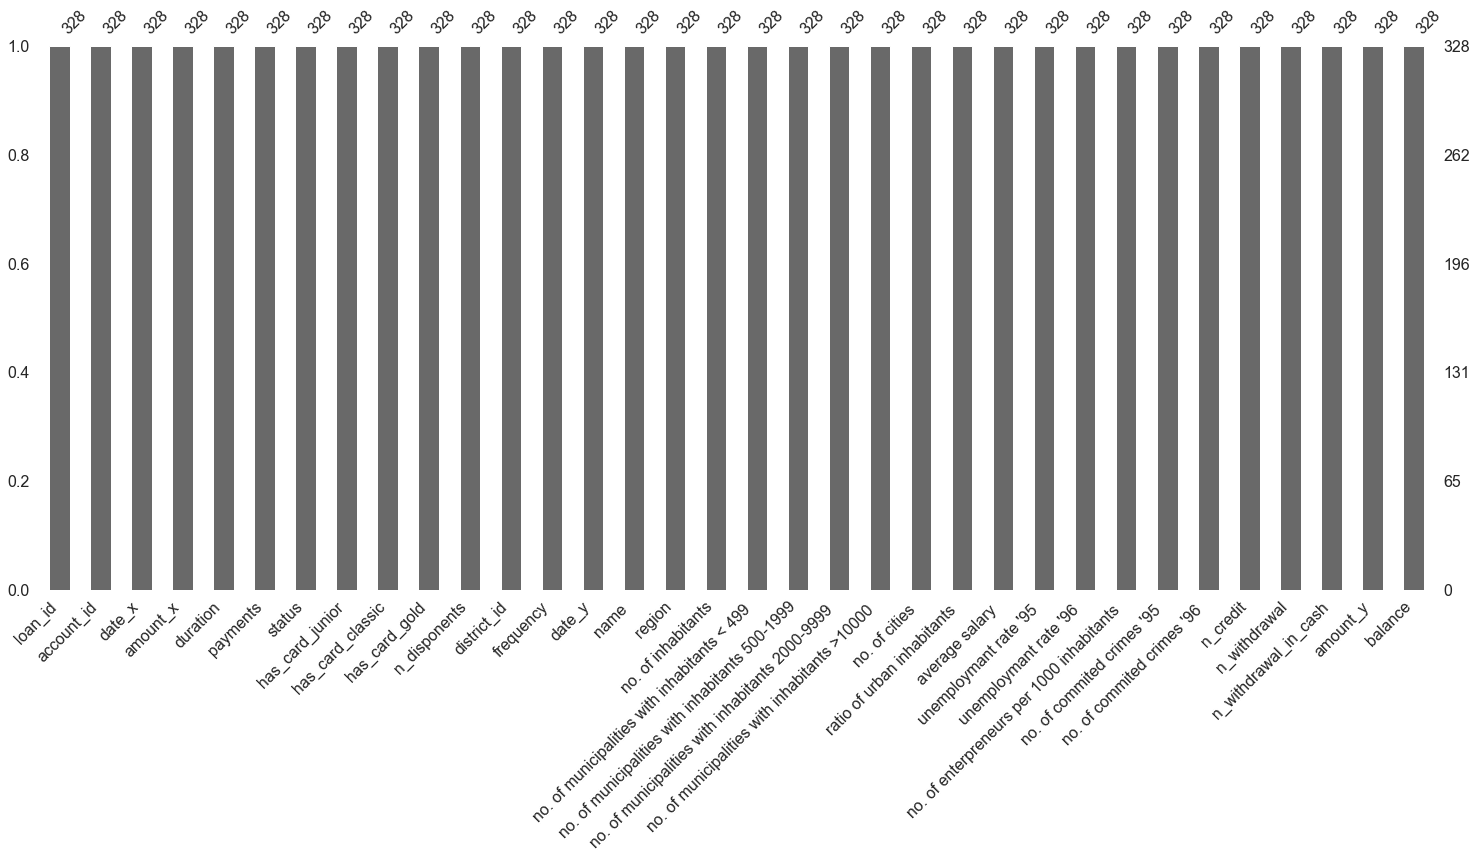

In [192]:
msno.bar(final_merged_df)

In [193]:
final_merged_df.head()

,loan_id,account_id,date_x,amount_x,duration,payments,status,has_card_junior,has_card_classic,has_card_gold,...,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,n_credit,n_withdrawal,n_withdrawal_in_cash,amount_y,balance
0,5314,1787,930705,96396,12,8033,-1,0,0,0,...,3.38,3.67,100,2985,2804,4,0,0,5025.000000,12250.000000
1,5316,1801,930711,165960,36,4610,1,0,0,0,...,1.79,2.31,117,2854,2618,17,18,2,11015.635135,52083.859459
2,6863,9188,930728,127080,60,2118,1,0,0,0,...,2.28,2.89,132,2080,2122,15,9,0,5417.458333,30060.954167
3,5325,1843,930803,105804,36,2939,1,0,0,0,...,3.83,4.31,137,3804,3868,13,12,0,8253.080000,41297.480000
4,7240,11013,930906,274740,60,4579,1,0,0,0,...,0.29,0.43,167,85677,99107,13,14,0,18945.966667,57188.211111


In [194]:
final_merged_df.columns

Index(['loan_id', 'account_id', 'date_x', 'amount_x', 'duration', 'payments',
       'status', 'has_card_junior', 'has_card_classic', 'has_card_gold',
       'n_disponents', 'district_id', 'frequency', 'date_y', 'name ', 'region',
       'no. of inhabitants', 'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 ',
       'n_credit', 'n_withdrawal', 'n_withdrawal_in_cash', 'amount_y',
       'balance'],
      dtype='object')

In [202]:
 # removes district info, not id
 final_merged_df = final_merged_df.drop(['loan_id', 'account_id', 'frequency', 'date_y', 'name ', 'region', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ', 'no. of municipalities with inhabitants >10000 ', 'no. of cities ', 'ratio of urban inhabitants ', 'average salary ', 'unemploymant rate \'95 ', 'unemploymant rate \'96 ', 'no. of enterpreneurs per 1000 inhabitants ', 'no. of commited crimes \'95 ', 'no. of commited crimes \'96 ', 'no. of inhabitants', 'no. of municipalities with inhabitants < 499 ', 'amount_x'], axis=1)

In [203]:
final_merged_df.columns

Index(['date_x', 'duration', 'payments', 'status', 'has_card_junior',
       'has_card_classic', 'has_card_gold', 'n_disponents', 'district_id',
       'n_credit', 'n_withdrawal', 'n_withdrawal_in_cash', 'amount_y',
       'balance'],
      dtype='object')

In [204]:
final_merged_df = final_merged_df.rename(columns={final_merged_df.columns[0]: 'loan_date'})
final_merged_df = final_merged_df.rename(columns={final_merged_df.columns[13]: 'mean_transaction_amount'})
final_merged_df.columns

Index(['loan_date', 'duration', 'payments', 'status', 'has_card_junior',
       'has_card_classic', 'has_card_gold', 'n_disponents', 'district_id',
       'n_credit', 'n_withdrawal', 'n_withdrawal_in_cash', 'amount_y',
       'mean_transaction_amount'],
      dtype='object')

In [205]:
final_merged_df['loan_date'] = final_merged_df['loan_date'].apply(lambda x: '19' + str(x)[0:2] + '-' + str(x)[2:4] + '-' + str(x)[4:6])
final_merged_df['loan_date'] = pd.to_datetime(final_merged_df['loan_date'])
final_merged_df

,loan_date,duration,payments,status,has_card_junior,has_card_classic,has_card_gold,n_disponents,district_id,n_credit,n_withdrawal,n_withdrawal_in_cash,amount_y,mean_transaction_amount
0,1993-07-05,12,8033,-1,0,0,0,0,30,4,0,0,5025.000000,12250.000000
1,1993-07-11,36,4610,1,0,0,0,0,46,17,18,2,11015.635135,52083.859459
2,1993-07-28,60,2118,1,0,0,0,0,45,15,9,0,5417.458333,30060.954167
3,1993-08-03,36,2939,1,0,0,0,0,12,13,12,0,8253.080000,41297.480000
4,1993-09-06,60,4579,1,0,0,0,0,1,13,14,0,18945.966667,57188.211111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1996-12-12,48,3242,1,0,0,0,1,72,70,102,0,4895.974419,44197.509884
324,1996-12-15,60,3703,-1,0,0,0,0,29,28,30,1,11725.494915,55230.444068
325,1996-12-21,48,938,1,0,0,0,0,70,20,19,0,7779.815385,41994.907692
326,1996-12-25,36,3217,1,0,0,0,0,16,51,66,7,13280.084677,56646.516129


In [206]:
feat_enc = LabelEncoder()
final_merged_df['duration'] = feat_enc.fit_transform(final_merged_df['duration'])

feat_enc2 = LabelEncoder()
final_merged_df['district_id'] = feat_enc2.fit_transform(final_merged_df['district_id'])

final_merged_df

,loan_date,duration,payments,status,has_card_junior,has_card_classic,has_card_gold,n_disponents,district_id,n_credit,n_withdrawal,n_withdrawal_in_cash,amount_y,mean_transaction_amount
0,1993-07-05,0,8033,-1,0,0,0,0,28,4,0,0,5025.000000,12250.000000
1,1993-07-11,2,4610,1,0,0,0,0,42,17,18,2,11015.635135,52083.859459
2,1993-07-28,4,2118,1,0,0,0,0,41,15,9,0,5417.458333,30060.954167
3,1993-08-03,2,2939,1,0,0,0,0,11,13,12,0,8253.080000,41297.480000
4,1993-09-06,4,4579,1,0,0,0,0,0,13,14,0,18945.966667,57188.211111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1996-12-12,3,3242,1,0,0,0,1,68,70,102,0,4895.974419,44197.509884
324,1996-12-15,4,3703,-1,0,0,0,0,27,28,30,1,11725.494915,55230.444068
325,1996-12-21,3,938,1,0,0,0,0,66,20,19,0,7779.815385,41994.907692
326,1996-12-25,2,3217,1,0,0,0,0,15,51,66,7,13280.084677,56646.516129


In [207]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_date                328 non-null    datetime64[ns]
 1   duration                 328 non-null    int64         
 2   payments                 328 non-null    int64         
 3   status                   328 non-null    int64         
 4   has_card_junior          328 non-null    int64         
 5   has_card_classic         328 non-null    int64         
 6   has_card_gold            328 non-null    int64         
 7   n_disponents             328 non-null    int64         
 8   district_id              328 non-null    int64         
 9   n_credit                 328 non-null    int64         
 10  n_withdrawal             328 non-null    int64         
 11  n_withdrawal_in_cash     328 non-null    int64         
 12  amount_y                 328 non-nul

<AxesSubplot:>

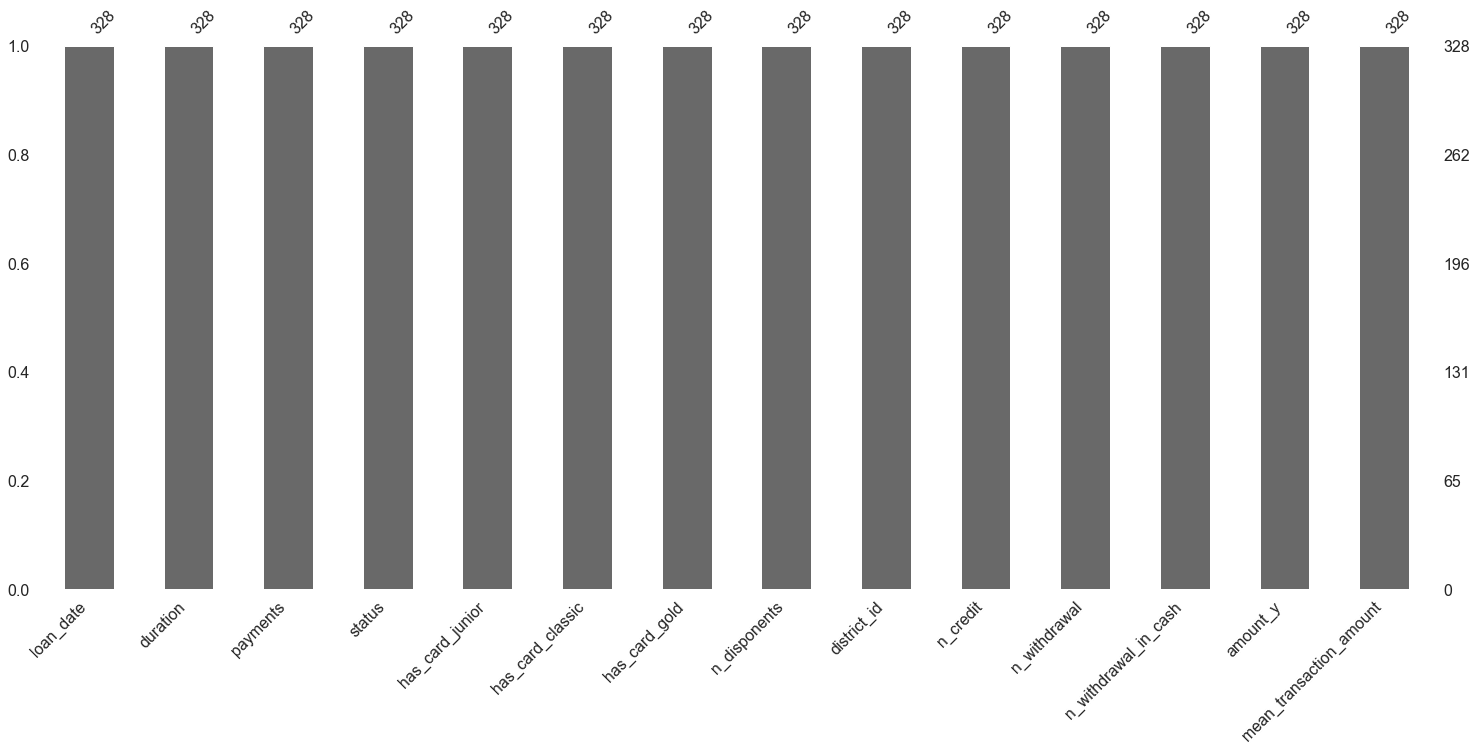

In [208]:
msno.bar(final_merged_df)